In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cooler
import bioframe
import cooltools

/home/user230/miniconda3/envs/mchip-c/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home/user230/miniconda3/envs/mchip-c/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


In [2]:
EP_pairs=pd.read_csv("Summary_output_datasets/E-P_pairs.txt", sep="\t")
EP_pairs=EP_pairs.loc[EP_pairs["MicroC.loop"] & ~(EP_pairs["overlaps.CTCF"]),:]
EP_pairs["chrom1"]=EP_pairs["target_site.chr"]
EP_pairs["start1"]=EP_pairs["target_gene.start"]-50
EP_pairs["end1"]=EP_pairs["target_gene.start"]+50
EP_pairs=EP_pairs[["chrom1","start1","end1","target_site.chr","target_site.start", "target_site.stop"]]
EP_pairs.columns=["chrom1","start1","end1","chrom2","start2","end2"]
EP_pairs_left=EP_pairs[EP_pairs["start1"]< EP_pairs["start2"]]
EP_pairs_right=EP_pairs[EP_pairs["start1"]>EP_pairs["start2"]]
EP_pairs_right.columns=['chrom2', 'start2', 'end2','chrom1', 'start1', 'end1']

In [3]:
DHSP_pairs=pd.read_csv("Summary_output_datasets/DHS-P_pairs.txt", sep="\t")
DHSP_pairs=DHSP_pairs.loc[DHSP_pairs["MicroC.loop"] & ~(DHSP_pairs["overlaps.CTCF"]),:]
DHSP_pairs["chrom1"]=DHSP_pairs["target_site.chr"]
DHSP_pairs["start1"]=DHSP_pairs["target_gene.start"]-50
DHSP_pairs["end1"]=DHSP_pairs["target_gene.start"]+50
DHSP_pairs=DHSP_pairs[["chrom1","start1","end1","target_site.chr","target_site.start", "target_site.stop"]]
DHSP_pairs.columns=["chrom1","start1","end1","chrom2","start2","end2"]
DHSP_pairs_left=DHSP_pairs[DHSP_pairs["start1"]< DHSP_pairs["start2"]]
DHSP_pairs_right=DHSP_pairs[DHSP_pairs["start1"]>DHSP_pairs["start2"]]
DHSP_pairs_right.columns=['chrom2', 'start2', 'end2','chrom1', 'start1', 'end1']

In [4]:
clr_250 = cooler.Cooler("MicroC_output/cools/MicroC.mcool::/resolutions/250")
clr_1000 = cooler.Cooler("MicroC_output/cools/MicroC.mcool::/resolutions/1000")
df_chroms=pd.DataFrame(data={"chrom":clr_250.chromsizes.index, "start":0, 
                             "end":clr_250.chromsizes.values, "name":clr_250.chromsizes.index})

In [9]:
stack_left = cooltools.pileup(clr_250, EP_pairs_left, df_chroms, flank=20000, min_diag=20)
stack_right = cooltools.pileup(clr_250, EP_pairs_right, df_chroms, flank=20000, min_diag=20)
mtx_left = np.nanmean(stack_left, axis=2)
mtx_right = np.nanmean(stack_right, axis=2)
mtx_right=list(zip(*mtx_right))
mtx_EP_250 = mtx_left + mtx_right
mtx_EP_250_zoom=mtx_EP_250[61:100,61:100]
stack_left = cooltools.pileup(clr_1000, EP_pairs_left, df_chroms, flank=20000, min_diag=5)
stack_right = cooltools.pileup(clr_1000, EP_pairs_right, df_chroms, flank=20000, min_diag=5)
mtx_left = np.nanmean(stack_left, axis=2)
mtx_right = np.nanmean(stack_right, axis=2)
mtx_right=list(zip(*mtx_right))
mtx_EP_1000 = mtx_left + mtx_right
stack_left = cooltools.pileup(clr_250, DHSP_pairs_left, df_chroms, flank=20000, min_diag=20)
stack_right = cooltools.pileup(clr_250, DHSP_pairs_right, df_chroms, flank=20000, min_diag=20)
mtx_left = np.nanmean(stack_left, axis=2)
mtx_right = np.nanmean(stack_right, axis=2)
mtx_right=list(zip(*mtx_right))
mtx_DHSP_250 = mtx_left + mtx_right
mtx_DHSP_250_zoom=mtx_DHSP_250[61:100,61:100]
stack_left = cooltools.pileup(clr_1000, DHSP_pairs_left, df_chroms, flank=20000, min_diag=5)
stack_right = cooltools.pileup(clr_1000, DHSP_pairs_right, df_chroms, flank=20000, min_diag=5)
mtx_left = np.nanmean(stack_left, axis=2)
mtx_right = np.nanmean(stack_right, axis=2)
mtx_right=list(zip(*mtx_right))
mtx_DHSP_1000 = mtx_left + mtx_right

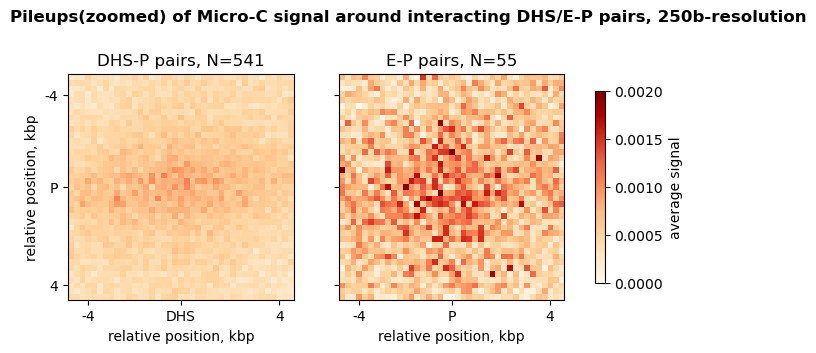

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
ax1, ax2 = axes
im1=ax1.imshow(
    mtx_DHSP_250_zoom,
    vmin=0,
    vmax=0.002,
    cmap='OrRd')
ax1.set_xticks([3,19,36])
ax1.set_xticklabels([-4,"DHS",4])
ax1.set_xlabel('relative position, kbp')
ax1.set_yticks([3,19,36])
ax1.set_yticklabels([-4,"P",4])
ax1.set_ylabel('relative position, kbp')
ax1.set_title(F"DHS-P pairs, N={len(DHSP_pairs)}")
im2=ax2.imshow(
    mtx_EP_250_zoom,
    vmin=0,
    vmax=0.002,
    cmap='OrRd')
ax2.set_xticks([3,19,36])
ax2.set_xticklabels([-4,"P",4])
ax2.set_xlabel('relative position, kbp')
ax2.set_yticks([3,19,36])
ax2.set_yticklabels([])
ax2.set_title(F"E-P pairs, N={len(EP_pairs)}")
fig.suptitle("Pileups(zoomed) of Micro-C signal around interacting DHS/E-P pairs, 250b-resolution", 
             x=0.55, y=0.85, weight="bold")
fig.colorbar(im2, ax=[ax1,ax2], label="average signal", shrink=0.5)
plt.savefig("Figures/Fig.S6/S6a_250bp_pileups_zoomed.pdf")

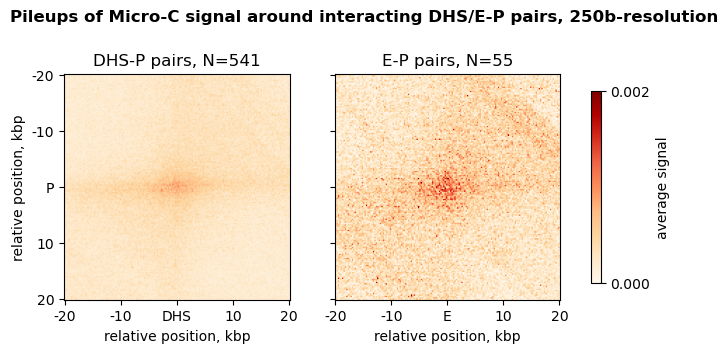

In [15]:
ticks_pixels = np.linspace(0, 20000*2//250,5)
ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*250//1000).astype(int)
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
ax1, ax2 = axes
im1=ax1.imshow(
    mtx_DHSP_250,
    vmin=0,
    vmax=0.002,
    cmap='OrRd')
ax1.set_xticks(ticks_pixels)
ax1.set_xticklabels([-20,-10, "DHS", 10,20])
ax1.set_xlabel('relative position, kbp')
ax1.set_yticks(ticks_pixels)
ax1.set_yticklabels([-20,-10, "P", 10,20])
ax1.set_ylabel('relative position, kbp')
ax1.set_title(F"DHS-P pairs, N={len(DHSP_pairs)}")
im2=ax2.imshow(
    mtx_EP_250,
    vmin=0,
    vmax=0.002,
    cmap='OrRd')
ax2.set_xticks(ticks_pixels)
ax2.set_xticklabels([-20,-10, "E", 10,20])
ax2.set_xlabel('relative position, kbp')
ax2.set_yticks(ticks_pixels)
ax2.set_yticklabels([])
ax2.set_title(F"E-P pairs, N={len(EP_pairs)}")
fig.suptitle("Pileups of Micro-C signal around interacting DHS/E-P pairs, 250b-resolution", 
             y=0.85, weight="bold")
fig.colorbar(im2, ax=[ax1,ax2], label="average signal", ticks=[0,0.002], shrink=0.5)
plt.savefig("Figures/Fig.S6/S6a_250bp_pileups.pdf")

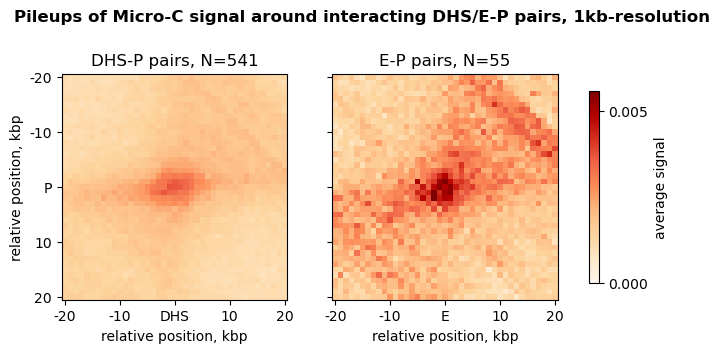

In [16]:
ticks_pixels = np.linspace(0, 20000*2//1000,5)
ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*1000//1000).astype(int)
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
ax1, ax2 = axes
im1=ax1.imshow(
    mtx_DHSP_1000,
    vmin=0,
    vmax=np.max(mtx_EP_1000),
    cmap='OrRd')
ax1.set_xticks(ticks_pixels)
ax1.set_xticklabels([-20,-10, "DHS", 10,20])
ax1.set_xlabel('relative position, kbp')
ax1.set_yticks(ticks_pixels)
ax1.set_yticklabels([-20,-10, "P", 10,20])
ax1.set_ylabel('relative position, kbp')
ax1.set_title(F"DHS-P pairs, N={len(DHSP_pairs)}")
im2=ax2.imshow(
    mtx_EP_1000,
    vmin=0,
    vmax=np.max(mtx_EP_1000),
    cmap='OrRd')
ax2.set_xticks(ticks_pixels)
ax2.set_xticklabels([-20,-10, "E", 10,20])
ax2.set_xlabel('relative position, kbp')
ax2.set_yticks(ticks_pixels)
ax2.set_yticklabels([])
ax2.set_title(F"E-P pairs, N={len(EP_pairs)}")
fig.suptitle("Pileups of Micro-C signal around interacting DHS/E-P pairs, 1kb-resolution", 
             y=0.85, weight="bold")
fig.colorbar(im2, ax=[ax1,ax2], label="average signal", ticks=[0,0.005], shrink=0.5)
plt.savefig("Figures/Fig.S6/S6a_1kbp_pileups.pdf")